<h3>2019104035 장서연 - 머신러닝 과제 1의 (1)번

# 1. 다항회귀 과제

<h3><b><목차></b></h3>

(1) 간단한 2차방정식으로 비선형 데이터를 생성하고 그래프를 그린다.<br>
(2) 훈련 데이터를 2차 다항으로 변환한다.<br>
(3) 선형 회귀를 적용하여 예측하고 훈련 데이터와 예측 그래프를 중첩하여 그래프로 그린다.<br>
(4) 1차, 2차, 50차 다항 변환을 하고, 각 예측 값을 비교하여 그래프로 그린다.<br>
(5) 단순 선형 회귀 모델의 학습 곡선을 그래프로 그려라.<br>
(6) 20차 다항 회귀의 학습 곡선을 그래프로 그려라.<br>

<b>(1) 간단한 2차방정식으로 비선형 데이터를 생성하고 그래프를 그린다.

In [2]:
# 데이터 생성을 위해, numpy와 numpy.random 모듈을 불러옵니다.

In [158]:
import numpy as np
import numpy.random as rnd

np.random.seed(42)

In [172]:
#원본 데이터 생성, 2차 방정식의 형태로 데이터를 만들어 보겠습니다

m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 +np.random.randn(m,1)

In [148]:
# 그래프를 그리기 위해, 그래프 모듈을 불러옵니다.

import matplotlib as mpl
import matplotlib.pyplot as plt

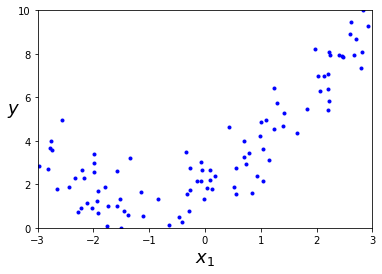

In [173]:
#난수가 잘 생성 되었나 확인해 봅니다.

plt.plot(X,y,"b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3,3,0, 10])
plt.show()

In [276]:
# 훈련 데이터를 2차 다항으로 변환하기 위해, 사이킷런 모듈을 불러옵니다.
# 다항 특성을 추가하는 것이므로, polynomialfeatures 함수를 가져오면 됩니다.
# 그리고 데이터를 보정해줄 Standardscaler 함수도 불러옵니다.

from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

In [277]:
#모델을 좀더 순차적으로 만들고, 보기 편하게 하기 위해 pipeline 함수도 사용하고자 합니다.

from sklearn.pipeline import Pipeline 

<b>(2) 훈련 데이터를 2차 다항으로 변환한다.

In [278]:
poly_2_features = PolynomialFeatures(degree = 2, include_bias = False)
X_poly= poly_2_features.fit_transform(X)

2차 다항 데이터, X_poly가 생겼습니다.

In [279]:
X_poly

array([[-7.99863515e-02,  6.39781642e-03],
       [ 2.24053943e+00,  5.02001693e+00],
       [ 2.40421118e+00,  5.78023142e+00],
       [-4.69674439e-01,  2.20594078e-01],
       [-1.33903322e+00,  1.79300996e+00],
       [ 5.54101972e-01,  3.07028995e-01],
       [ 2.47418007e+00,  6.12156704e+00],
       [-1.73602687e+00,  3.01378928e+00],
       [ 7.37799501e-01,  5.44348104e-01],
       [ 7.89361321e-01,  6.23091294e-01],
       [ 1.39867813e+00,  1.95630052e+00],
       [-2.21059389e+00,  4.88672534e+00],
       [ 1.29494979e+00,  1.67689495e+00],
       [ 2.45419512e+00,  6.02307371e+00],
       [-1.92190135e+00,  3.69370479e+00],
       [-1.57474005e+00,  2.47980623e+00],
       [ 2.82837056e+00,  7.99968005e+00],
       [-1.91413828e+00,  3.66392537e+00],
       [ 2.12631056e+00,  4.52119660e+00],
       [-4.63328613e-02,  2.14673404e-03],
       [-1.51661355e+00,  2.30011667e+00],
       [ 2.22449941e+00,  4.94839761e+00],
       [-3.28168470e-01,  1.07694545e-01],
       [ 8.

<b>(3) 선형 회귀를 적용하여 예측하고 훈련 데이터와 예측 그래프를 중첩하여 그래프로 그린다.

In [280]:
# 선형회귀 모델을 import 해줍니다.

from sklearn.linear_model import LinearRegression

먼저,<br> <b>1) 제가 다항으로 훈련 데이터를 만들고 직접 스케일링 해 모델을 학습시키는 과정</b>
   <br>을 보여드리고,</b><br><b>2) 사이킷런의 Pipeline 모듈을 이용해서,바로 다항 회귀를 하는 과정</b> <br>을 보여드리겠습니다.

In [281]:
lin_reg = LinearRegression()
std_scaler = StandardScaler()


In [282]:
#선형모델 lin_reg를 2차 다항 데이터로 학습시키고, 선형모델의 theta0와 theta1 2을 출력해 보겠습니다.

lin_reg.fit(X_poly, y)

print("theta0: ",lin_reg.intercept_)
print("theta1: " ,lin_reg.coef_[0,0])
print("theta2: ", lin_reg.coef_[0,1])

theta0:  [1.91006612]
theta1:  1.1564503163031643
theta2:  0.5371326196468551


In [283]:
#이제 테스트용 데이터를 만들 차례입니다.

X_test = np.linspace(-3, 3, 100).reshape(100, 1)
X_test_poly = poly_2_features.fit_transform(X_test)

In [54]:
# X_test는 100행 1열의 무작위 테스트 데이터셋,
# X_test_poly는 X_test를 변환한 100행 2열의 테스트 데이터 셋입니다.

In [284]:
y_predict = lin_reg.predict(X_test_poly)

(3) 선형 회귀를 적용하여 예측하고 훈련 데이터와 예측 그래프를 중첩하여 그래프로 그린다.

y_predict는 2차 다항변환한 테스트셋을 학습시킨 예측값입니다. 
이제 데이터와, 선형회귀의 예측간의 그래프를 그려보겠습니다.

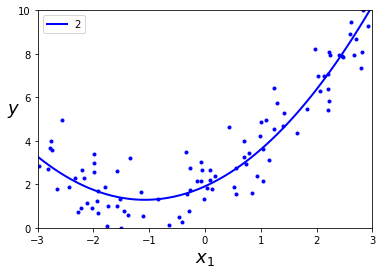

In [320]:
plt.plot(X_test, y_predict, 'b-', label='2', linewidth=2) #2차

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

In [300]:
# 이번엔 데이터를 50차로 변환해 모델을 학습시켜 보겠습니다.

poly_50_features = PolynomialFeatures(degree = 50, include_bias=False)

X_new = poly_50_features.fit_transform(X)
X_50 = std_scaler.fit(X_new) #데이터를 스케일링 하는 부분
X_50 = std_scaler.transform(X_new) #데이터를 스케일링 하는 부분

50차 다항 데이터 변환부터는 데이터가 기하급수적으로 커지다 보니, 데이터의 스케일링이 필요했습니다. <br>(스케일링을 안해주면 그래프가 이상하게 나오더라구요.) 그래서 50차에서는 학습세트와 시험세트를 StandardScaler로 스케일링 해주었습니다.

In [311]:
X_50[0] # 훈련 데이터를 50차변환 후 스케일링 까지 한 예시 모습입니다.

array([-0.08539358, -1.15921848, -0.05860997, -0.80219421, -0.07501696,
       -0.64650029, -0.07945219, -0.55608974, -0.07706059, -0.49682347,
       -0.07179685, -0.4544959 , -0.06547927, -0.42194236, -0.05883455,
       -0.39527905, -0.05213454, -0.37233878, -0.04548019, -0.35190127,
       -0.03891549, -0.33328133, -0.03246922, -0.31609783, -0.02616764,
       -0.30014027, -0.02003655, -0.28529074, -0.01409991, -0.2714785 ,
       -0.00837818, -0.25865406, -0.00288714, -0.24677516,  0.00236251,
       -0.23579988,  0.00736504, -0.2256838 ,  0.01211908, -0.21637948,
        0.016627  , -0.20783708,  0.02089404, -0.20000543,  0.02492765,
       -0.19283309,  0.0287368 , -0.18626943,  0.03233147, -0.1802654 ])

In [301]:
lin_reg.fit(X_50, y)

LinearRegression()

In [302]:
X_test_new = poly_50_features.transform(X_test)
X_test_50 = std_scaler.transform(X_test_new) #데이터 스케일링하는 부분
y_predict_50 = lin_reg.predict(X_test_50)

In [313]:
X_test_50[0] #테스트 데이터가 스케일링 된 예시 모습입니다.

array([ -1.73485658,   2.16890015,  -2.64653454,   2.98537384,
        -3.38269643,   3.66870639,  -4.02875611,   4.29781869,
        -4.6332092 ,   4.9083769 ,  -5.22247206,   5.51404796,
        -5.80737548,   6.11781015,  -6.39041121,   6.71798743,
        -6.97019673,   7.31122451,  -7.54385669,   7.89395848,
        -8.10827215,   8.46314713,  -8.66073203,   9.01659621,
        -9.19924445,   9.55305006,  -9.72263842,  10.07213858,
       -10.23053322,  10.57424334, -10.72323003,  11.06032837,
       -11.20156679,  11.53176744, -11.6667659 ,  11.99018794,
       -12.12029382,  12.43734166, -12.56374305,  12.87500547,
       -12.99874009,  13.30491034, -13.42687864,  13.72869478,
       -13.84967487,  14.14787753, -14.26854052,  14.56384493,
       -14.68476961,  14.97784848])

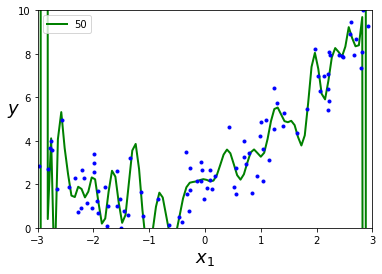

In [297]:
plt.plot(X_test, y_predict_50, 'g-',label='50', linewidth=2)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

In [305]:
# 마찬가지로, 1차 다항식의 데이터로 학습시켜 보겠습니다. 1차는 굳이 데이터를 스케일링 하진 않았습니다.

In [306]:
poly_1_features = PolynomialFeatures(degree = 1, include_bias = False)

X_1 = poly_1_features.fit_transform(X)
lin_reg.fit(X_1, y)

X_test_1 = poly_1_features.transform(X_test)
y_predict_1 = lin_reg.predict(X_test_1)

In [310]:
X_1[0] # 1차 데이터 예시입니다.

array([-0.07998635])

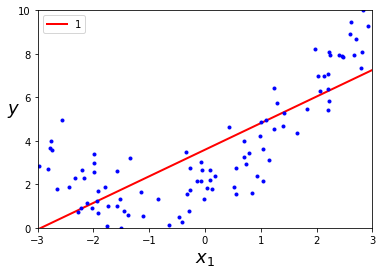

In [314]:
plt.plot(X_test, y_predict_1, 'r-',label='1', linewidth=2)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

위와 같은 방법도 있지만, pipeline을 이용하면 데이터를 다항으로 변환하지 않아도<br>
모듈이 알아서 모델을 만들어 주기 때문에, Pipeline 모듈을 이용해 회귀 모델을<br>만드는 과정에 대해서도 소개하고자 합니다.

In [315]:
regression_Pipeline_2 = Pipeline([
    
    ("poly_features", poly_2_features),
    ("scaler", StandardScaler()),
    ("lin_reg", LinearRegression()),
    
])

In [316]:
#pipeline으로 만든 2차 회귀 모델을 학습시켜줍니다.

regression_Pipeline_2.fit(X, y)

Pipeline(steps=[('poly_features', PolynomialFeatures(include_bias=False)),
                ('scaler', StandardScaler()), ('lin_reg', LinearRegression())])

In [317]:
#X_test_poly_2 를 2차 다항 회귀 모델에 적응시켜, 예측값을 도출해 보겠습니다.

y_test_predict_2 = regression_Pipeline_2.predict(X_test)

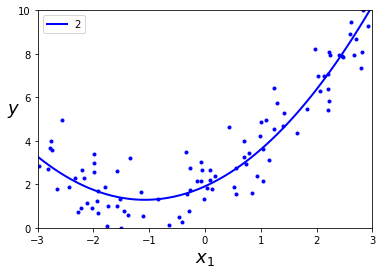

In [319]:
#이건 그림 그리는 부분
plt.plot(X_test, y_test_predict_2, 'b-', label='2', linewidth=2) #2차

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

In [321]:
#50차 함수를 pipeline으로 나타낸 것 입니다.

regression_Pipeline_50 = Pipeline([
    
    ("poly_features", poly_50_features),
    ("scaler", StandardScaler()),
    ("lin_reg", LinearRegression()),
    
])

regression_Pipeline_50.fit(X, y)
y_test_predict_50 = regression_Pipeline_50.predict(X_test)


#1차 함수를 pipeline으로 나타낸 것 입니다.

regression_Pipeline_1 = Pipeline([
    
    ("poly_features", poly_1_features),
    ("scaler", StandardScaler()),
    ("lin_reg", LinearRegression()),
    
])

regression_Pipeline_1.fit(X, y)
y_test_predict_1 = regression_Pipeline_1.predict(X_test)

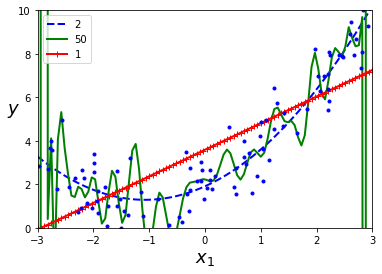

In [322]:
plt.plot(X_test, y_test_predict_2, 'b--', label='2', linewidth=2) #2차
plt.plot(X_test, y_test_predict_50, 'g-', label='50', linewidth=2) #50차
plt.plot(X_test, y_test_predict_1, 'r-+', label='1', linewidth=2) #2차

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()


<b>(5) 단순 선형 회귀 모델의 학습 곡선을 그래프로 그려라.

In [326]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)  
    plt.xlabel("Training set size", fontsize=14) 
    plt.ylabel("RMSE", fontsize=14)              

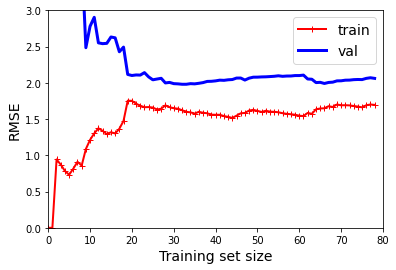

In [327]:
plot_learning_curves(regression_Pipeline_1, X, y)
plt.axis([0, 80, 0, 3])
plt.show()

<b>(6) 20차 다항 회귀의 학습 곡선을 그래프로 그려라.

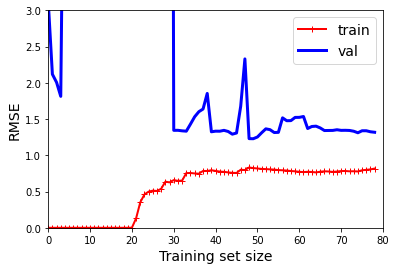

In [331]:
regression_Pipeline_20 = Pipeline([
    ("poly_features", PolynomialFeatures(degree=20, include_bias = False)),
    ("scaler", StandardScaler()),
    ("lin_reg", LinearRegression()),
    

])

plot_learning_curves(regression_Pipeline_20, X, y)
plt.axis([0, 80, 0, 3])
plt.show()